## Step 1: MTI Dataset

The very first step is started by reading the data from as CSV file using Pandas library. Then a primary data exploration step is being done to find out any missing categories and the distribution for each type of indicator (I/E, N/S, T/F, J/P).

In [22]:
import pandas as pd


datastore_Path = "C:/Users/Shaya/Desktop/Ryerson/Sync/CIND820/Dataset/(MBTI) Myers-Briggs Personality Type Dataset/mbti_1.csv"

pd.set_option('display.max_colwidth', 500)
mbti_Dataset = pd.read_csv(datastore_Path,  sep=",", header = 0, encoding = 'unicode_escape')
mbti_Dataset.columns = ['Type','Posts']
mbti_Dataset.head()

,Type,Posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...


### 1-1 : High level data exploration

In [23]:
#What is the shaper of our dataset:
print("Dataset has {} rows and {} columns".format(len(mbti_Dataset), len(mbti_Dataset.columns)),'\n')

#Personality Type variation on the Dataset
print('Number of each personality type:', dict(mbti_Dataset.value_counts(subset='Type')),'\n')

#How many missing data are in the Dataset:
print('Number of missing values in personality Type: {}'.format(mbti_Dataset['Type'].isnull().sum()))
print('Number of missing values in Posts: {}'.format(mbti_Dataset['Posts'].isnull().sum()))

Dataset has 8675 rows and 2 columns 

Number of each personality type: {'INFP': 1832, 'INFJ': 1470, 'INTP': 1304, 'INTJ': 1091, 'ENTP': 685, 'ENFP': 675, 'ISTP': 337, 'ISFP': 271, 'ENTJ': 231, 'ISTJ': 205, 'ENFJ': 190, 'ISFJ': 166, 'ESTP': 89, 'ESFP': 48, 'ESFJ': 42, 'ESTJ': 39} 

Number of missing values in personality Type: 0
Number of missing values in Posts: 0


<AxesSubplot:ylabel='Type'>

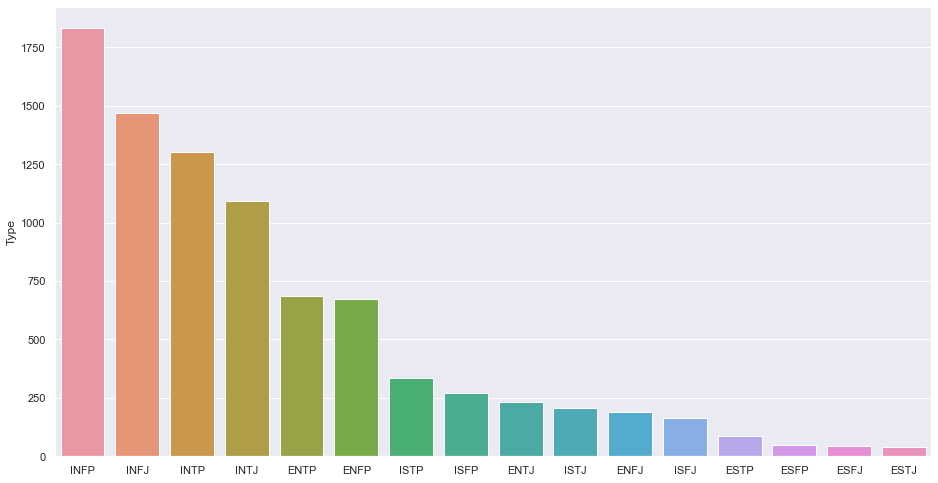

In [111]:
import seaborn as sns

graph = mbti_Dataset.value_counts(subset='Type')
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x=mbti_Dataset.Type.value_counts().index, y=mbti_Dataset.Type.value_counts())


## Step 2: Clean Text/Descriptive
Tokenization means that we are splitting our text into smaller pieces, in our case words. Each of these smaller pieces are called tokens.


### 2-1: Removeing punctuation/URLs/Contraction and checking for emoji

In [27]:
import string
import re
import contractions
from emoji import UNICODE_EMOJI
string.punctuation

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def remove_Contraction(text):
    """Remove Contraction from the input Text"""
    return contractions.fix(text)

def check_Emoji(text):
    """Check if text has Emoji"""
    return text in UNICODE_EMOJI['en']


def remove_punctuation(text):
    """Remove Punctuation from the input Text"""
    """!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"""
    text_punctuated = "".join([char for char in text if char not in string.punctuation])
    return text_punctuated

mbti_Dataset['Posts'] = mbti_Dataset['Posts'].str.replace('|||', ' ', regex = False)
mbti_Dataset['Posts'] = mbti_Dataset['Posts'].apply(lambda x: remove_URL(x))
mbti_Dataset['Posts'] = mbti_Dataset['Posts'].apply(lambda x: remove_Contraction(x))

emoji_Result = mbti_Dataset['Posts'].apply(lambda x: check_Emoji(x))
if emoji_Result.any():
    print("We have emoji on the Dataset")
else:
    print('No emoji on Dataset')

mbti_Dataset['Posts_Punctuated'] = mbti_Dataset['Posts'].apply(lambda x: remove_punctuation(x))
mbti_Dataset.head()

No emoji on Dataset


,Type,Posts,Posts_Punctuated,Posts_Tokenized
0,INFJ,"' and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ ENFJ7. Sorry to hear of your distress. it is only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth,...",and intj moments sportscenter not top ten plays pranks What has been the most lifechanging experience in your life On repeat for most of today May the PerC Experience immerse you The last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace ENFJ7 Sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as 84389 ...,"[, a, n, d, i, n, t, j, m, o, m, e, n, t, s, s, p, o, r, t, s, c, e, n, t, e, r, n, o, t, t, o, p, t, e, n, p, l, a, y, s, p, r, a, n, k, s, w, h, a, t, h, a, s, b, e, e, n, t, h, e, m, o, s, t, l, i, f, e, c, h, a, n, g, i, n, g, e, x, p, e, r, i, e, n, c, e, i, n, y, o, u, r, l, i, f, e, o, n, r, ...]"
1,ENTP,'I am finding the lack of me in these posts very alarming. Sex can be boring if it is in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There is not enough... Giving new meaning to 'Game' theory. Hello *ENTP Grin* that is all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. This + L...,I am finding the lack of me in these posts very alarming Sex can be boring if it is in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There is not enough Giving new meaning to Game theory Hello ENTP Grin that is all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins This Lack of Balance ...,"[i, a, m, f, i, n, d, i, n, g, t, h, e, l, a, c, k, o, f, m, e, i, n, t, h, e, s, e, p, o, s, t, s, v, e, r, y, a, l, a, r, m, i, n, g, s, e, x, c, a, n, b, e, b, o, r, i, n, g, i, f, i, t, i, s, i, n, t, h, e, s, a, m, e, p, o, s, i, t, i, o, n, o, f, t, e, n, f, o, r, e, x, a, m, p, l, e, m, e, a, ...]"
2,INTP,"'Good one _____ course, to which I say I know; that is my blessing and my curse. Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it is more I could be madly in love in case I reconciled my feelings (which at... No, I did not; thank you for a link! So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. it is like when you are stuck in your own thoughts, and your mind just wanders in circle...",Good one course to which I say I know that is my blessing and my curse Does being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it is more I could be madly in love in case I reconciled my feelings which at No I did not thank you for a link Socalled TiSi loop and it can stem from any current topicobsession can be deadly it is like when you are stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Ha...,"[g, o, o, d, o, n, e, c, o, u, r, s, e, t, o, w, h, i, c, h, i, s, a, y, i, k, n, o, w, t, h, a, t, i, s, m, y, b, l, e, s, s, i, n, g, a, n, d, m, y, c, u, r, s, e, d, o, e, s, b, e, i, n, g, a, b, s, o, l, u, t, e, l, y, p, o, s, i, t, i, v, e, t, h, a, t, y, o, u, a, n, d, y, o, u, r, b, e, s, t, ...]"
3,INTJ,"'Dear INTP, I enjoyed our conversation the oth

### 2-2: Tokenization

In [28]:
def tokenize_data(text):
    """Tokenizing input text"""
    tokens = re.split('\W+', text.lower())
    return tokens

mbti_Dataset['Posts_Tokenized'] = mbti_Dataset['Posts_Punctuated'].apply(lambda x: tokenize_data(x))
mbti_Dataset.head()

,Type,Posts,Posts_Punctuated,Posts_Tokenized
0,INFJ,"' and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ ENFJ7. Sorry to hear of your distress. it is only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth,...",and intj moments sportscenter not top ten plays pranks What has been the most lifechanging experience in your life On repeat for most of today May the PerC Experience immerse you The last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace ENFJ7 Sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as 84389 ...,"[, and, intj, moments, sportscenter, not, top, ten, plays, pranks, what, has, been, the, most, lifechanging, experience, in, your, life, on, repeat, for, most, of, today, may, the, perc, experience, immerse, you, the, last, thing, my, infj, friend, posted, on, his, facebook, before, committing, suicide, the, next, day, rest, in, peace, enfj7, sorry, to, hear, of, your, distress, it, is, only, natural, for, a, relationship, to, not, be, perfection, all, the, time, in, every, moment, of, exist..."
1,ENTP,'I am finding the lack of me in these posts very alarming. Sex can be boring if it is in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There is not enough... Giving new meaning to 'Game' theory. Hello *ENTP Grin* that is all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. This + L...,I am finding the lack of me in these posts very alarming Sex can be boring if it is in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There is not enough Giving new meaning to Game theory Hello ENTP Grin that is all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins This Lack of Balance ...,"[i, am, finding, the, lack, of, me, in, these, posts, very, alarming, sex, can, be, boring, if, it, is, in, the, same, position, often, for, example, me, and, my, girlfriend, are, currently, in, an, environment, where, we, have, to, creatively, use, cowgirl, and, missionary, there, is, not, enough, giving, new, meaning, to, game, theory, hello, entp, grin, that, is, all, it, takes, than, we, converse, and, they, do, most, of, the, flirting, while, i, acknowledge, their, presence, and, return..."
2,INTP,"'Good one _____ course, to which I say I know; that is my blessing and my curse. Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it is more I could be madly in love in case I reconciled my feelings (which at... No, I did not; thank you for a link! So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. it is like when you are stuck in your own thoughts, and your mind just wanders in circle...",Good one course to which I say I know that is my blessing and my curse Does being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it is more I could be madly in love in case I reconciled my feelings which at No I did not thank you for a link Socalled TiSi loop and it can stem from any current topicobsession can be deadly it is like when you are stuck in your own thoughts and your mind just wanders in circles 

### 2-3: Remove Stopwords

In [5]:
import nltk

def remove_Stopwords(text):
    """Removing Stops words"""
    stopwords = nltk.corpus.stopwords.words('english')
    text_stopwords = [word for word in text if word not in stopwords]
    return(text_stopwords)

mbti_Dataset['Posts_Stopwords'] = mbti_Dataset['Posts_Tokenized'].apply(lambda x: remove_Stopwords(x))

mbti_Dataset.head()

,Type,Posts,Posts_Punctuated,Posts_Tokenized,Posts_Stopwords
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. it is only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as time...,enfp and intj moments sportscenter not top ten plays pranks What has been the most lifechanging experience in your life On repeat for most of today May the PerC Experience immerse you The last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace Hello ENFJ7 Sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growt...,"[, enfp, and, intj, moments, sportscenter, not, top, ten, plays, pranks, what, has, been, the, most, lifechanging, experience, in, your, life, on, repeat, for, most, of, today, may, the, perc, experience, immerse, you, the, last, thing, my, infj, friend, posted, on, his, facebook, before, committing, suicide, the, next, day, rest, in, peace, hello, enfj7, sorry, to, hear, of, your, distress, it, is, only, natural, for, a, relationship, to, not, be, perfection, all, the, time, in, every, mome...","[, enfp, intj, moments, sportscenter, top, ten, plays, pranks, lifechanging, experience, life, repeat, today, may, perc, experience, immerse, last, thing, infj, friend, posted, facebook, committing, suicide, next, day, rest, peace, hello, enfj7, sorry, hear, distress, natural, relationship, perfection, time, every, moment, existence, try, figure, hard, times, times, growth, 84389, 84390, welcome, stuff, game, set, match, prozac, wellbrutin, least, thirty, minutes, moving, legs, mean, moving,..."
1,ENTP,'I am finding the lack of me in these posts very alarming. Sex can be boring if it is in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There is not enough... Giving new meaning to 'Game' theory. Hello *ENTP Grin* that is all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. This + L...,I am finding the lack of me in these posts very alarming Sex can be boring if it is in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There is not enough Giving new meaning to Game theory Hello ENTP Grin that is all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins This Lack of Balance ...,"[i, am, finding, the, lack, of, me, in, these, posts, very, alarming, sex, can, be, boring, if, it, is, in, the, same, position, often, for, example, me, and, my, girlfriend, are, currently, in, an, environment, where, we, have, to, creatively, use, cowgirl, and, missionary, there, is, not, enough, giving, new, meaning, to, game, theory, hello, entp, grin, that, is, all, it, takes, than, we, converse, and, they, do, most, of, the, flirting, while, i, acknowledge, their, presence, and, return...","[finding, lack, posts, alarming, sex, boring, position, often, example, girlfriend, currently, environment, creatively, use, cowgirl, missionary, enough, giving, new, meaning, game, theory, hello, entp, grin, takes, converse, flirting, acknowledge, presence, return, words, smooth, wordplay, cheeky, grins, lack, balance, hand, eye, coordination, real, iq, test, score, 127, internet, iq, tests, funny, score, 140s, higher, like, former, responses, thr

In [6]:

def stemming(text):
    """Steming the input text using Porter Stemmer from NLTK package"""
    nltk_PS = nltk.PorterStemmer()
    text_Stem = [nltk_PS.stem(word) for word in text]
    return(text_Stem)

def lemmatizing(text):
    """Lemmatizing the input text using WordNet and NLTK package"""
    NLTK_WNL = nltk.WordNetLemmatizer()
    text_Lem = [NLTK_WNL.lemmatize(word) for word in text]
    return(text_Lem)

mbti_Dataset['Posts_Stemmed'] = mbti_Dataset['Posts_Stopwords'].apply(lambda x: stemming(x))
mbti_Dataset['Posts_Lemmatized'] = mbti_Dataset['Posts_Stopwords'].apply(lambda x: lemmatizing(x))

mbti_Dataset.head()

,Type,Posts,Posts_Punctuated,Posts_Tokenized,Posts_Stopwords,Posts_Stemmed,Posts_Lemmatized
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. it is only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as time...,enfp and intj moments sportscenter not top ten plays pranks What has been the most lifechanging experience in your life On repeat for most of today May the PerC Experience immerse you The last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace Hello ENFJ7 Sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growt...,"[, enfp, and, intj, moments, sportscenter, not, top, ten, plays, pranks, what, has, been, the, most, lifechanging, experience, in, your, life, on, repeat, for, most, of, today, may, the, perc, experience, immerse, you, the, last, thing, my, infj, friend, posted, on, his, facebook, before, committing, suicide, the, next, day, rest, in, peace, hello, enfj7, sorry, to, hear, of, your, distress, it, is, only, natural, for, a, relationship, to, not, be, perfection, all, the, time, in, every, mome...","[, enfp, intj, moments, sportscenter, top, ten, plays, pranks, lifechanging, experience, life, repeat, today, may, perc, experience, immerse, last, thing, infj, friend, posted, facebook, committing, suicide, next, day, rest, peace, hello, enfj7, sorry, hear, distress, natural, relationship, perfection, time, every, moment, existence, try, figure, hard, times, times, growth, 84389, 84390, welcome, stuff, game, set, match, prozac, wellbrutin, least, thirty, minutes, moving, legs, mean, moving,...","[, enfp, intj, moment, sportscent, top, ten, play, prank, lifechang, experi, life, repeat, today, may, perc, experi, immers, last, thing, infj, friend, post, facebook, commit, suicid, next, day, rest, peac, hello, enfj7, sorri, hear, distress, natur, relationship, perfect, time, everi, moment, exist, tri, figur, hard, time, time, growth, 84389, 84390, welcom, stuff, game, set, match, prozac, wellbrutin, least, thirti, minut, move, leg, mean, move, sit, desk, chair, weed, moder, mayb, tri, ed...","[, enfp, intj, moment, sportscenter, top, ten, play, prank, lifechanging, experience, life, repeat, today, may, perc, experience, immerse, last, thing, infj, friend, posted, facebook, committing, suicide, next, day, rest, peace, hello, enfj7, sorry, hear, distress, natural, relationship, perfection, time, every, moment, existence, try, figure, hard, time, time, growth, 84389, 84390, welcome, stuff, game, set, match, prozac, wellbrutin, least, thirty, minute, moving, leg, mean, moving, sittin..."
1,ENTP,'I am finding the lack of me in these posts very alarming. Sex can be boring if it is in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There is not enough... Giving new meaning to 'Game' theory. Hello *ENTP Grin* that is all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. This + L...,I am finding the lack of me in these posts very alarming Sex can be boring if it is in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There is not enough Giving new meaning to Game theory Hello ENTP Grin that is all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return 

In [61]:
top_Words = {}
for s in mbti_Dataset['Posts_Lemmatized']:
    print(mbti_Dataset['Posts_Lemmatized'][s])
    break
    #top = data[c].sort_values(ascending=False).head(30)
    #top_dict[c]= list(zip(top.index, top.values))

top_Words

KeyError: "None of [Index(['', 'enfp', 'intj', 'moment', 'sportscenter', 'top', 'ten', 'play',\n       'prank', 'lifechanging',\n       ...\n       'mentality', 'confirmed', 'intj', 'way', 'move', 'denver', 'area',\n       'start', 'new', 'life'],\n      dtype='object', length=313)] are in the [index]"

## Step 3: Vectorize

### 3-1: Count Vectorization
First I am testing on a small sample of data to validate and understand it better.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_countvec = CountVectorizer(analyzer=lemmatizing)
small_Lem_CV = small_countvec.fit_transform(small_Data['Posts_Lemmatized'])

print(small_countvec.get_feature_names())
print(small_Lem_CV.shape)

tion', 'defragmented', 'degree', 'deity', 'delicious', 'delusional', 'denial', 'denver', 'dependant', 'depends', 'deposition', 'depression', 'depth', 'describe', 'described', 'description', 'deserve', 'design', 'designated', 'desire', 'desired', 'desk', 'desktop', 'despicable', 'destined', 'destroying', 'detail', 'detective', 'determined', 'determining', 'develop', 'developed', 'deviantart', 'devil', 'diagnosis', 'diary', 'dichotomy', 'died', 'different', 'difficult', 'dig', 'dillards', 'dipped', 'direction', 'directly', 'dirty', 'disagree', 'disagrees', 'disbelief', 'discipline', 'discover', 'disdain', 'disempowered', 'dishonesty', 'disick', 'disinclined', 'dislike', 'dispense', 'disposal', 'disproved', 'distance', 'distinction', 'distorted', 'distracted', 'distress', 'disturbed', 'disturbing', 'dogma', 'dollar', 'dominant', 'dominate', 'dominates', 'domination', 'done', 'dorm', 'dormer', 'double', 'doublethink', 'doubt', 'douchebags', 'downed', 'download', 'downloaded', 'dozen', 'dra

In [54]:
small_Lem_DF = pd.DataFrame(small_Lem_CV.toarray())
small_Lem_DF.columns = small_countvec.get_feature_names()
small_Lem_DF

,,1,10,100,101130am,1030,1125,12,127,140s,...,yo,young,younger,youtubing,yup,zakk,zombie,zone,zoom,â
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
7,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Now I am runing it on the full dataset

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_Vec = CountVectorizer(analyzer=lemmatizing)
full_Lem_CV = count_Vec.fit_transform(mbti_Dataset['Posts_Lemmatized'])

print(full_Lem_CV.shape)

(8675, 148734)


### 3-2: N-gram Vectorizing
First I am testing on a small sample of data to validate and understand it better.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_Ngram = CountVectorizer(ngram_range=(1,3))
temp_Dataset = small_Data['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
small_Lem_Ngram = small_Ngram.fit_transform(temp_Dataset)

print(small_Ngram.get_feature_names())
print(small_Lem_Ngram.shape)


ne dark film', 'underworld', 'underworld pluto', 'underworld pluto shamanism', 'unfortunately', 'unfortunately thank', 'unfortunately thank god', 'unfortunately trouble', 'unfortunately trouble mustering', 'unhappiness', 'unhappiness buy', 'unhappiness buy evej', 'unicorn', 'unicorn chime', 'unicorn chime posted', 'unicorn chime see', 'universe', 'universe government', 'universe government world', 'universe idea', 'universe idea every', 'unlocking', 'unlocking whatever', 'unlocking whatever think', 'unnerved', 'unnerved look', 'unnerved look commented', 'unphased', 'unphased either', 'unphased either social', 'unquestionably', 'unquestionably yes', 'unquestionably yes useful', 'unrelated', 'unrelated people', 'unrelated people know', 'unsolicited', 'unsolicited victim', 'unsolicited victim sometimes', 'unstable', 'unstable one', 'unstable one handle', 'unstable right', 'unstable right word', 'unstable sensitive', 'unstable sensitive unstable', 'unsure', 'unsure generally', 'unsure gene

In [55]:
#Sparse Matrix
small_Ngram_DF = pd.DataFrame(small_Lem_Ngram.toarray())
small_Ngram_DF.columns = small_Ngram.get_feature_names()
small_Ngram_DF

,10,10 episode,10 episode season1,10 people,10 people fired,100,100 committed,100 committed 247,101130am,101130am personal,...,zakk wylde musical,zombie,zombie moth,zombie moth attracted,zone,zone sake,zone sake emotional,zoom,zoom fact,zoom fact question
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

full_Ngram = CountVectorizer(ngram_range=(1,3))
temp_Dataset = mbti_Dataset['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
full_Lem_Ngram = full_Ngram.fit_transform(temp_Dataset)

print(full_Lem_Ngram.shape)


(8675, 7377049)


### 3-3: Invers Document Frequency Weighting
####        tf-idf(t, d) = tf(t, d) * log(N/(df + 1))

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_TFIDF = TfidfVectorizer(analyzer=lemmatizing)
small_Lem_TFIDF = small_TFIDF.fit_transform(small_Data['Posts_Lemmatized'])

print(small_TFIDF.get_feature_names())
print(small_Lem_TFIDF.shape)

tion', 'defragmented', 'degree', 'deity', 'delicious', 'delusional', 'denial', 'denver', 'dependant', 'depends', 'deposition', 'depression', 'depth', 'describe', 'described', 'description', 'deserve', 'design', 'designated', 'desire', 'desired', 'desk', 'desktop', 'despicable', 'destined', 'destroying', 'detail', 'detective', 'determined', 'determining', 'develop', 'developed', 'deviantart', 'devil', 'diagnosis', 'diary', 'dichotomy', 'died', 'different', 'difficult', 'dig', 'dillards', 'dipped', 'direction', 'directly', 'dirty', 'disagree', 'disagrees', 'disbelief', 'discipline', 'discover', 'disdain', 'disempowered', 'dishonesty', 'disick', 'disinclined', 'dislike', 'dispense', 'disposal', 'disproved', 'distance', 'distinction', 'distorted', 'distracted', 'distress', 'disturbed', 'disturbing', 'dogma', 'dollar', 'dominant', 'dominate', 'dominates', 'domination', 'done', 'dorm', 'dormer', 'double', 'doublethink', 'doubt', 'douchebags', 'downed', 'download', 'downloaded', 'dozen', 'dra

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TFIDF = TfidfVectorizer(analyzer=lemmatizing)
full_Lem_tfidf = vectorizer_TFIDF.fit_transform(mbti_Dataset['Posts_Lemmatized'])

print(full_Lem_tfidf.shape)

(8675, 148734)


(8675, 7)